# Hands-on Lab --- Data Prep

## Importing packages:

In [11]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt


pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)
pd.set_option('display.precision', 2)

In [12]:
import os
os.chdir(r'C:\Users\gupta\Desktop\BAN\clt')

## Reading comma separated files into dataframes.
## Change the path below to point to churn and margin data:

In [13]:
churn_df = pd.read_csv(r'TP_churn_data.csv')
margin_df = pd.read_csv(r'TP_margin_data.csv')
demog_df= pd.read_csv(r'TP_demog_data.csv')

In [14]:
# Investigating the long character lengths of the owner vs renter variable
# where, in the code below, demog_df is a dataframe of the demographics data TP_demog_data.csv

print(" ") 
print("count of accounts by ownrent variable")
print(" ") 
print(demog_df.groupby('demog_ownrent')['acct_ID'].count())


# recoding the long values for ownrent variable

demog_df['demog_ownrent']=np.where(demog_df['demog_ownrent']=='Definite Owner (any type dwelling unit)','Definite Owner',
                        np.where(demog_df['demog_ownrent']=='Probable Owner (any type dwelling unit)','Probable Owner',
                                 demog_df['demog_ownrent']))


# Counts of records by Length-of-Residence metric

print(" ") 
print("count of accounts by LOR variable")
print(" ") 
print(demog_df.groupby('demog_LOR')['acct_ID'].count())


# recoding the LOR variable to collapse levels

demog_df['demog_LOR']=np.where(demog_df['demog_LOR']=='00 - 06 Months','00 to 05 years',
                         np.where(demog_df['demog_LOR']=='07 - 12 Months','00 to 05 years',
                         np.where(demog_df['demog_LOR']=='13 - 18 Months','00 to 05 years', 
                         np.where(demog_df['demog_LOR']=='19 - 24 Months','00 to 05 years',
                         np.where(demog_df['demog_LOR']=='3rd Year',      '00 to 05 years',
                         np.where(demog_df['demog_LOR']=='4th Year',      '00 to 05 years', 
                         np.where(demog_df['demog_LOR']=='5th Year',      '00 to 05 years',  
                         np.where(demog_df['demog_LOR']=='6th Year',      '06 to 10 years',   
                         np.where(demog_df['demog_LOR']=='7th Year',      '06 to 10 years', 
                         np.where(demog_df['demog_LOR']=='8th Year',      '06 to 10 years',   
                         np.where(demog_df['demog_LOR']=='9th Year',      '06 to 10 years',
                         np.where(demog_df['demog_LOR']=='10th Year',     '06 to 10 years',     
                         np.where(demog_df['demog_LOR']=='11th Year',     '11 to 19 years',     
                         np.where(demog_df['demog_LOR']=='12th Year',     '11 to 19 years',  
                         np.where(demog_df['demog_LOR']=='13th Year',     '11 to 19 years',     
                         np.where(demog_df['demog_LOR']=='14th Year',     '11 to 19 years',  
                         np.where(demog_df['demog_LOR']=='15th Year',     '11 to 19 years',     
                         np.where(demog_df['demog_LOR']=='16th Year',     '11 to 19 years',  
                         np.where(demog_df['demog_LOR']=='17th Year',     '11 to 19 years',     
                         np.where(demog_df['demog_LOR']=='18th Year',     '11 to 19 years',
                         np.where(demog_df['demog_LOR']=='19th Year',     '11 to 19 years',     
                         np.where(demog_df['demog_LOR']=='20 or more Years',     '20+ years',                                    
                                 demog_df['demog_LOR']))))))))))))))))))))))

print(" ") 
print("count of account IDs by new LOR levels")
print(" ") 
print(demog_df.groupby('demog_LOR')['acct_ID'].count())


# creating some numeric versions of some of the categorical demographics

demog_df['demog_assets_num']=np.nan
demog_df['demog_assets_num']=np.where(demog_df['demog_assets']== 'IPA <= 25000',        12500, 
                      np.where(demog_df['demog_assets']== '25000 < IPA <= 50000',       37500,
                      np.where(demog_df['demog_assets']== '50000 < IPA <= 75000',       62500,
                      np.where(demog_df['demog_assets']== '75000 < IPA <= 100000',      87500,
                      np.where(demog_df['demog_assets']== '100000 < IPA <= 250000',    175000,
                      np.where(demog_df['demog_assets']== '250000 < IPA <= 500000',    375000,
                      np.where(demog_df['demog_assets']== '500000 < IPA <= 750000',    650000,
                      np.where(demog_df['demog_assets']== '750000 < IPA <= 1000000',   875000,
                      np.where(demog_df['demog_assets']== '1000000 < IPA <= 2000000', 1500000,
                      np.where(demog_df['demog_assets']== '2000000 < IPA', 2500000, demog_df['demog_assets_num']))))))))))

demog_df['demog_inc_num']=np.nan
demog_df['demog_inc_num']=np.where(demog_df['demog_inc_fine']== 'Less than $15000',10000, 
                      np.where(demog_df['demog_inc_fine']== '$  15000 - $  19999', 17500,
                      np.where(demog_df['demog_inc_fine']== '$  20000 - $  29999', 25000,
                      np.where(demog_df['demog_inc_fine']== '$  30000 - $  39999', 35000,
                      np.where(demog_df['demog_inc_fine']== '$  40000 - $  49999', 45000,
                      np.where(demog_df['demog_inc_fine']== '$  50000 - $  74999', 62500,
                      np.where(demog_df['demog_inc_fine']== '$  75000 - $  99999', 87500,
                      np.where(demog_df['demog_inc_fine']== '$ 100000 - $124999', 112500,
                      np.where(demog_df['demog_inc_fine']== '$ 125000 - $149999', 137500,
                      np.where(demog_df['demog_inc_fine']== '$ 150000 - $174999', 162500,
                      np.where(demog_df['demog_inc_fine']== '$ 175000 - $199999', 187500,
                      np.where(demog_df['demog_inc_fine']== '$ 200000 - $249999', 225000,
                      np.where(demog_df['demog_inc_fine']== '$ 250000 or more',   300000, demog_df['demog_inc_num'])))))))))))))

# and dropping the original non-numeric versions from the data:

demog_df = demog_df.drop(['demog_inc_fine','demog_assets'
                              ],axis=1)

 
count of accounts by ownrent variable
 
demog_ownrent
Definite Owner (any type dwelling unit)    153895
Definite Renter                              5388
Probable Owner (any type dwelling unit)      4016
Probable Renter                              5245
Name: acct_ID, dtype: int64
 
count of accounts by LOR variable
 
demog_LOR
00 - 06 Months       4920
07 - 12 Months       3600
10th Year            8362
11th Year            7829
12th Year            7336
13 - 18 Months       6796
13th Year            6305
14th Year            5869
15th Year            5954
16th Year            5429
17th Year            5418
18th Year            5261
19 - 24 Months       7283
19th Year            4389
20 or more Years    59828
3rd Year            15922
4th Year            13748
5th Year            12410
6th Year            12486
7th Year            10485
8th Year            10008
9th Year             8591
Name: acct_ID, dtype: int64
 
count of account IDs by new LOR levels
 
demog_LOR
00 to 05 years 

In [15]:
#Correctly classify demog_span into a object type
demog_df.demog_span=demog_df.demog_span.astype('object')

#Make a list of all the object varaible from demographic dataset that are needed to be one hot encoded
demo_ob_list=list(demog_df.columns[demog_df.dtypes=='object'])
demo_ob_list.remove('acct_ID')

#imput missing value
demog_df[demo_ob_list]=demog_df[demo_ob_list].fillna('Missing')
demog_df.demog_generations.fillna(demog_df.demog_generations.mean(),inplace=True)
demog_df.demog_adults.fillna(demog_df.demog_adults.mean(),inplace=True)
demog_df.demog_assets_num.fillna(demog_df.demog_assets_num.mean(),inplace=True)
demog_df.demog_inc_num.fillna(demog_df.demog_inc_num.mean(),inplace=True)

## Use the head method to view churn dataframe:

In [16]:
churn_df.head()

,ST,Zip,DMA,Area_Cd,emailable,solicit_ph_ind,solicit_email_ind,fixd_incm_flg,scheduled_purchase_flg,months_since_last_trans,months_since_first_trans,purch_cnt_life,purch_amt_life,purch_cnt_cc_36mo,purch_cnt_et_36mo,purch_cnt_ck_36mo,purch_cnt_tt_36mo,purch_amt_36mo,purch_avg_36mo,purch_avg_interval,mail_cnt_36mo,resp_cnt_36mo,call_in_mo_36mo,call_out_mo_36mo,order_cnt_36mo,tier,tier_prev,acct_ID,activation_date,event_date,churn_year_plus1_ind
0,SC,29607,567,864,1,1,1,0,0,3,21,5,145.0,4,0,1,5,145.0,29.00,4.50,5,0,0,1,1,1-Bronze,xxx,I148760611,30NOV12,31MAY15,1
1,MO,63901,632,573,1,1,1,0,0,9,9,1,20.0,0,0,1,1,20.0,20.00,-1.00,1,0,1,0,1,1-Bronze,xxx,I151076142,29NOV13,29NOV14,1
2,IL,60456,602,missing,0,1,1,0,0,1,167,102,2890.0,0,0,17,17,600.0,35.29,3.07,17,2,0,0,4,1-Bronze,xxx,I27001315,05OCT00,NaN,0
3,FL,34698,539,727,1,1,1,0,0,9,13,5,420.0,5,0,0,5,420.0,84.00,1.00,5,0,1,1,3,3-Gold,xxx,I150064127,31JUL13,29NOV14,1
4,CA,92084,825,760,0,1,1,0,0,1,2,2,120.0,1,0,1,2,120.0,60.00,1.00,2,0,0,0,2,1-Bronze,xxx,I152631565,30JUN14,NaN,0


In [17]:
demog_df.head()

,demog_LOR,demog_ownrent,demog_age,demog_span,demog_inc_crs,demog_generations,demog_homevalue,demog_adults,acct_ID,demog_assets_num,demog_inc_num
0,00 to 05 years,Definite Renter,35-44 years old,1,$ 15000 - $ 29999,2.0,Missing,2.0,I148760611,12500.0,25000.00
1,00 to 05 years,Missing,35-44 years old,0,Missing,1.0,Missing,1.0,I151076142,12500.0,48346.28
2,11 to 19 years,Missing,55-64 years old,0,Less than $15000,1.0,Missing,1.0,I27001315,12500.0,10000.00
3,00 to 05 years,Definite Owner,55-64 years old,0,$ 50000 - $ 74999,1.0,$150000 - $199999,1.0,I150064127,375000.0,62500.00
4,06 to 10 years,Definite Owner,45-54 years old,0,$ 100000 - $149999,2.0,$350000 - $399999,3.0,I152631565,375000.0,112500.00


## Use pandas describe method to see variable stats,
##    and transpose to show variables as a list:

In [18]:
print(" summary stats on churn data ") 
print(churn_df.describe(include='all').transpose())

 summary stats on churn data 
                            count  unique         top    freq     mean      std  min      25%      50%      75%      max
ST                         240368      61          TX   21633      NaN      NaN  NaN      NaN      NaN      NaN      NaN
Zip                        240368   26124     missing     894      NaN      NaN  NaN      NaN      NaN      NaN      NaN
DMA                        240368     216         803    9721      NaN      NaN  NaN      NaN      NaN      NaN      NaN
Area_Cd                    240368     384     missing   13090      NaN      NaN  NaN      NaN      NaN      NaN      NaN
emailable                 2.4e+05     NaN         NaN     NaN     0.51      0.5    0        0        1        1        1
solicit_ph_ind            2.4e+05     NaN         NaN     NaN     0.89     0.31    0        1        1        1        1
solicit_email_ind         2.4e+05     NaN         NaN     NaN     0.96     0.19    0        1        1        1        1
fi

## Use head method to view margin dataframe:

In [19]:
margin_df.head()

,trans_amt_t_minus_00,trans_amt_t_minus_01,trans_amt_t_minus_02,trans_amt_t_minus_03,trans_amt_t_minus_04,trans_amt_t_minus_05,trans_amt_t_minus_06,trans_amt_t_minus_07,trans_amt_t_minus_08,trans_amt_t_minus_09,trans_amt_t_minus_10,trans_amt_t_minus_11,trans_amt_t_minus_12,trans_amt_t_minus_13,trans_amt_t_minus_14,trans_amt_t_minus_15,trans_amt_t_minus_16,trans_amt_t_minus_17,trans_amt_t_minus_18,trans_amt_t_minus_19,trans_amt_t_minus_20,trans_amt_t_minus_21,trans_amt_t_minus_22,trans_amt_t_minus_23,trans_amt_t_minus_24,...,cost_amt_t_minus_11,cost_amt_t_minus_10,cost_amt_t_minus_09,cost_amt_t_minus_08,cost_amt_t_minus_07,cost_amt_t_minus_06,cost_amt_t_minus_05,cost_amt_t_minus_04,cost_amt_t_minus_03,cost_amt_t_minus_02,cost_amt_t_minus_01,cost_amt_t_minus_00,cost_amt_t_plus_01,cost_amt_t_plus_02,cost_amt_t_plus_03,cost_amt_t_plus_04,cost_amt_t_plus_05,cost_amt_t_plus_06,cost_amt_t_plus_07,cost_amt_t_plus_08,cost_amt_t_plus_09,cost_amt_t_plus_10,cost_amt_t_plus_11,cost_amt_t_plus_12,acct_ID
0,0.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,50.0,0.0,40.0,0.0,20.0,0.0,0.0,0.0,0.0,...,0.00,0.56,0.24,0.56,0.29,0.23,0.52,0.80,2.41,2.71,0.82,0.64,1.76,0.60,1.69,0.30,0.82,0.30,0.82,0.00,0.56,0.00,1.09,0.56,I148760611
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,12.48,1.33,0.00,0.00,0.52,0.80,0.00,0.26,0.52,0.00,0.82,0.00,0.79,0.26,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,I151076142
2,25.0,0.0,0.0,50.0,30.0,0.0,60.0,30.0,0.0,140.0,0.0,25.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.0,0.0,35.0,0.0,...,1.07,0.56,4.83,0.48,1.07,2.37,0.00,1.87,1.37,2.65,0.26,1.37,1.89,1.37,1.69,1.37,0.82,1.07,1.59,1.07,1.93,3.41,1.59,1.93,I27001315
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84.0,84.0,84.0,84.0,84.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.70,5.16,3.29,1.80,0.94,0.94,4.95,0.80,0.30,2.91,0.26,0.84,1.72,0.30,0.00,0.00,0.00,0.30,0.00,0.00,0.00,0.00,0.00,0.30,I150064127
4,20.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.79,1.07,1.67,2.14,1.99,1.37,0.82,0.60,1.42,0.00,0.56,0.56,2.60,0.86,I152631565


## Modify margin data to only have ANNUAL margin numbers,
##    and print stats on the new margin dataframe:

In [20]:
margin_df['rev_Y_neg_1']=margin_df['trans_amt_t_minus_00']+margin_df['trans_amt_t_minus_01']+margin_df['trans_amt_t_minus_02']+margin_df['trans_amt_t_minus_03']+margin_df['trans_amt_t_minus_04']+margin_df['trans_amt_t_minus_05']+margin_df['trans_amt_t_minus_06']+margin_df['trans_amt_t_minus_07']+margin_df['trans_amt_t_minus_08']+margin_df['trans_amt_t_minus_09']+margin_df['trans_amt_t_minus_10']+margin_df['trans_amt_t_minus_11']
margin_df['cost_Y_neg_1']=margin_df['cost_amt_t_minus_00']+margin_df['cost_amt_t_minus_01']+margin_df['cost_amt_t_minus_02']+margin_df['cost_amt_t_minus_03']+margin_df['cost_amt_t_minus_04']+margin_df['cost_amt_t_minus_05']+margin_df['cost_amt_t_minus_06']+margin_df['cost_amt_t_minus_07']+margin_df['cost_amt_t_minus_08']+margin_df['cost_amt_t_minus_09']+margin_df['cost_amt_t_minus_10']+margin_df['cost_amt_t_minus_11']
margin_df['margin_Y_neg_1']=margin_df['rev_Y_neg_1']-margin_df['cost_Y_neg_1']

margin_df['rev_Y_neg_2']=margin_df['trans_amt_t_minus_12']+margin_df['trans_amt_t_minus_13']+margin_df['trans_amt_t_minus_14']+margin_df['trans_amt_t_minus_15']+margin_df['trans_amt_t_minus_16']+margin_df['trans_amt_t_minus_17']+margin_df['trans_amt_t_minus_18']+margin_df['trans_amt_t_minus_19']+margin_df['trans_amt_t_minus_20']+margin_df['trans_amt_t_minus_21']+margin_df['trans_amt_t_minus_22']+margin_df['trans_amt_t_minus_23']
margin_df['cost_Y_neg_2']=margin_df['cost_amt_t_minus_12']+margin_df['cost_amt_t_minus_13']+margin_df['cost_amt_t_minus_14']+margin_df['cost_amt_t_minus_15']+margin_df['cost_amt_t_minus_16']+margin_df['cost_amt_t_minus_17']+margin_df['cost_amt_t_minus_18']+margin_df['cost_amt_t_minus_19']+margin_df['cost_amt_t_minus_20']+margin_df['cost_amt_t_minus_21']+margin_df['cost_amt_t_minus_22']+margin_df['cost_amt_t_minus_23']
margin_df['margin_Y_neg_2']=margin_df['rev_Y_neg_2']-margin_df['cost_Y_neg_2']

margin_df['rev_Y_neg_3']=margin_df['trans_amt_t_minus_24']+margin_df['trans_amt_t_minus_25']+margin_df['trans_amt_t_minus_26']+margin_df['trans_amt_t_minus_27']+margin_df['trans_amt_t_minus_28']+margin_df['trans_amt_t_minus_29']+margin_df['trans_amt_t_minus_30']+margin_df['trans_amt_t_minus_31']+margin_df['trans_amt_t_minus_32']+margin_df['trans_amt_t_minus_33']+margin_df['trans_amt_t_minus_34']+margin_df['trans_amt_t_minus_35']
margin_df['cost_Y_neg_3']=margin_df['cost_amt_t_minus_24']+margin_df['cost_amt_t_minus_25']+margin_df['cost_amt_t_minus_26']+margin_df['cost_amt_t_minus_27']+margin_df['cost_amt_t_minus_28']+margin_df['cost_amt_t_minus_29']+margin_df['cost_amt_t_minus_30']+margin_df['cost_amt_t_minus_31']+margin_df['cost_amt_t_minus_32']+margin_df['cost_amt_t_minus_33']+margin_df['cost_amt_t_minus_34']+margin_df['cost_amt_t_minus_35']
margin_df['margin_Y_neg_3']=margin_df['rev_Y_neg_3']-margin_df['cost_Y_neg_3']

margin_df['rev_Y_pos_1']=margin_df['trans_amt_t_plus_01']+margin_df['trans_amt_t_plus_02']+margin_df['trans_amt_t_plus_03']+margin_df['trans_amt_t_plus_04']+margin_df['trans_amt_t_plus_05']+margin_df['trans_amt_t_plus_06']+margin_df['trans_amt_t_plus_07']+margin_df['trans_amt_t_plus_08']+margin_df['trans_amt_t_plus_09']+margin_df['trans_amt_t_plus_10']+margin_df['trans_amt_t_plus_11']+margin_df['trans_amt_t_plus_12']
margin_df['cost_Y_pos_1']=margin_df['cost_amt_t_plus_01']+margin_df['cost_amt_t_plus_02']+margin_df['cost_amt_t_plus_03']+margin_df['cost_amt_t_plus_04']+margin_df['cost_amt_t_plus_05']+margin_df['cost_amt_t_plus_06']+margin_df['cost_amt_t_plus_07']+margin_df['cost_amt_t_plus_08']+margin_df['cost_amt_t_plus_09']+margin_df['cost_amt_t_plus_10']+margin_df['cost_amt_t_plus_11']+margin_df['cost_amt_t_plus_12']
margin_df['margin_Y_pos_1']=margin_df['rev_Y_pos_1']-margin_df['cost_Y_pos_1']

margin_df = margin_df[['acct_ID','margin_Y_neg_1','margin_Y_neg_2','margin_Y_neg_3','margin_Y_pos_1']]

print(" summary stats on margin data ") 
print(margin_df.describe(include='all').transpose())

 summary stats on margin data 
                  count  unique         top freq     mean      std      min  25%      50%      75%      max
acct_ID          240368  239356  I152639900    3      NaN      NaN      NaN  NaN      NaN      NaN      NaN
margin_Y_neg_1  2.4e+05     NaN         NaN  NaN  2.2e+02  1.5e+03 -1.5e+04   42  1.8e+02  3.4e+02  2.8e+05
margin_Y_neg_2  2.4e+05     NaN         NaN  NaN  1.9e+02  1.9e+03 -2.1e+04    0  1.3e+02  2.9e+02  4.7e+05
margin_Y_neg_3  2.4e+05     NaN         NaN  NaN  1.7e+02  2.1e+03 -7.5e+03    0       28  2.5e+02  4.9e+05
margin_Y_pos_1  2.4e+05     NaN         NaN  NaN  3.5e+02  2.1e+03 -3.5e+03 -2.2  1.6e+02  3.3e+02    4e+05


## Create bar chart to explore churn rates by tiers:

<AxesSubplot:title={'center':'Churn Rate by Tiers'}, xlabel='tier'>

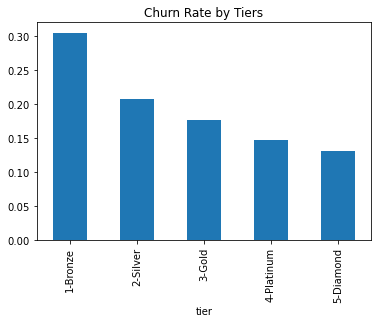

In [21]:
temp_df = churn_df.groupby(['tier'])['churn_year_plus1_ind'].mean()
temp_df.plot.bar(title="Churn Rate by Tiers")

## Create histogram to explore distribution of variables in churn data:

<AxesSubplot:title={'center':'Distribution of Purchase Amount'}, ylabel='Frequency'>

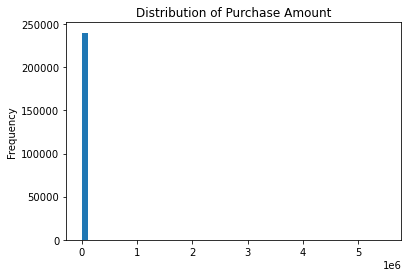

In [22]:
churn_df['purch_amt_life'].plot.hist(title="Distribution of Purchase Amount",bins=50)

## Create histogram to explore distribution of variables in margin data:

<AxesSubplot:title={'center':'Distribution of Prior Year Margin'}, ylabel='Frequency'>

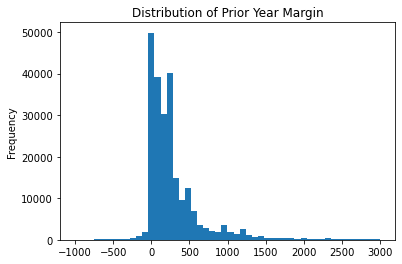

In [23]:
temp_df = margin_df.query('-1000<margin_Y_neg_1<3000')
temp_df['margin_Y_neg_1'].plot.hist(title="Distribution of Prior Year Margin",bins=50)

## Feature engineering on the Churn data:

In [24]:
""" when avg interval = -1 replace with 36 months """
churn_df['purch_avg_interval'].replace([-1], 36, inplace=True)

""" when avg purchase = -1 replace with 0 """
churn_df['purch_avg_36mo'].replace([-1], 0, inplace=True)

churn_df['log_order_cnt_36mo']=np.log10(churn_df['order_cnt_36mo']+1)
churn_df['log_purch_amt_36mo']=np.log10(churn_df['purch_amt_36mo']+1)
churn_df['log_purch_amt_life']=np.log10(churn_df['purch_amt_life']+1)
churn_df['log_purch_avg_36mo']=np.log10(churn_df['purch_avg_36mo']+1)
churn_df['log_purch_cnt_life']=np.log10(churn_df['purch_cnt_life']+1)
churn_df['log_purch_cnt_tt_36mo']=np.log10(churn_df['purch_cnt_tt_36mo']+1)
churn_df['log_resp_cnt_36mo']=np.log10(churn_df['resp_cnt_36mo']+1)

churn_df['perc_purch_cc_36mo']=np.where(churn_df['purch_cnt_tt_36mo']==0,0,churn_df['purch_cnt_cc_36mo']/churn_df['purch_cnt_tt_36mo'])
churn_df['perc_purch_ck_36mo']=np.where(churn_df['purch_cnt_tt_36mo']==0,0,churn_df['purch_cnt_ck_36mo']/churn_df['purch_cnt_tt_36mo'])
churn_df['perc_purch_et_36mo']=np.where(churn_df['purch_cnt_tt_36mo']==0,0,churn_df['purch_cnt_et_36mo']/churn_df['purch_cnt_tt_36mo'])

churn_df = churn_df.drop(['order_cnt_36mo','purch_amt_36mo','purch_amt_life','purch_avg_36mo','purch_cnt_life',
                          'purch_cnt_tt_36mo','resp_cnt_36mo',
                          'purch_cnt_cc_36mo','purch_cnt_ck_36mo','purch_cnt_et_36mo'],axis=1)

print(" summary stats on churn data ") 
print(churn_df.describe(include='all').transpose())

 summary stats on churn data 
                            count  unique         top    freq   mean   std  min   25%   50%      75%      max
ST                         240368      61          TX   21633    NaN   NaN  NaN   NaN   NaN      NaN      NaN
Zip                        240368   26124     missing     894    NaN   NaN  NaN   NaN   NaN      NaN      NaN
DMA                        240368     216         803    9721    NaN   NaN  NaN   NaN   NaN      NaN      NaN
Area_Cd                    240368     384     missing   13090    NaN   NaN  NaN   NaN   NaN      NaN      NaN
emailable                 2.4e+05     NaN         NaN     NaN   0.51   0.5    0     0     1        1        1
solicit_ph_ind            2.4e+05     NaN         NaN     NaN   0.89  0.31    0     1     1        1        1
solicit_email_ind         2.4e+05     NaN         NaN     NaN   0.96  0.19    0     1     1        1        1
fixd_incm_flg             2.4e+05     NaN         NaN     NaN  0.092  0.29    0     0     

## histogram plot on new log variable in Churn data

<AxesSubplot:title={'center':'Distribution of LOG of Purchase Amount'}, ylabel='Frequency'>

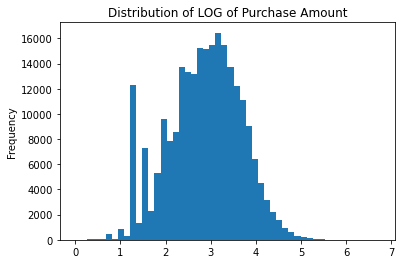

In [25]:
churn_df['log_purch_amt_life'].plot.hist(title="Distribution of LOG of Purchase Amount",bins=50)

## Feature engineering on margin data, while keeping original variables.
## Using logs with an offset that will account for very large negative margins:

In [26]:
margin_df['margin_3yr_avg']=(margin_df['margin_Y_neg_1']+margin_df['margin_Y_neg_2']+margin_df['margin_Y_neg_3'])/3
margin_df['log_margin_Y_neg_1']=np.log10(margin_df['margin_Y_neg_1']+50000)
margin_df['log_margin_Y_neg_2']=np.log10(margin_df['margin_Y_neg_2']+50000)
margin_df['log_margin_Y_neg_3']=np.log10(margin_df['margin_Y_neg_3']+50000)
margin_df['log_margin_3yr_avg']=np.log10(margin_df['margin_3yr_avg']+50000)
margin_df['log_margin_Y_pos_1']=np.log10(margin_df['margin_Y_pos_1']+50000)

## Histogram on transformed target for Margin data

<AxesSubplot:title={'center':'Distribution of LOG of Future Margin'}, ylabel='Frequency'>

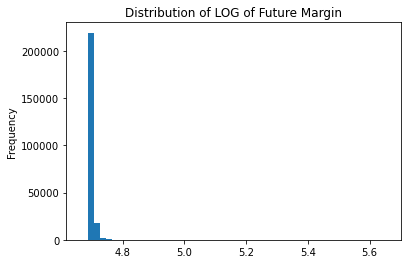

In [27]:
margin_df['log_margin_Y_pos_1'].plot.hist(title="Distribution of LOG of Future Margin",bins=50)

## Scatter plot on Future Margin vs Prior Margin (logarithms):

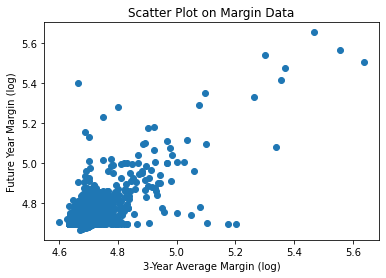

In [28]:
plt.scatter(margin_df['log_margin_3yr_avg'], margin_df['log_margin_Y_pos_1'])
plt.xlabel("3-Year Average Margin (log)")
plt.ylabel("Future Year Margin (log)")
plt.title("Scatter Plot on Margin Data")
print(" ") 
plt.show()

## Eliminating duplicate acct_IDs before joining data:

In [29]:
churn_df.drop_duplicates(subset=['acct_ID'], keep='first', inplace=True)
churn_df.shape

(239356, 31)

In [30]:
margin_df.drop_duplicates(subset=['acct_ID'], keep='first', inplace=True)
margin_df.shape

(239356, 11)

## Join Churn , Margin and demographic data by acct_ID:

In [31]:
combined_df = pd.merge(churn_df, margin_df, on='acct_ID', how='inner')
combined_df = pd.merge(combined_df, demog_df, on='acct_ID', how='inner')
combined_df.shape

(240368, 51)

## Create dummy variables for certain categorical variables.

In [32]:
""" WARNING: this commented-out approach would create dummy indicators for all """
"""    categorical variables, including those with very high cardinality, such as zip codes """
"""    and also would drop the original categorical variables and only keep the dummy indicators """

""" combined_df = pd.get_dummies(combined_df) """

""" this approach hand-picks only certain variables for which to create dummy indicators """
""" and keeps the original variables too """

for column in ['ST', 'tier', 'tier_prev']+demo_ob_list:
    dummies = pd.get_dummies(combined_df[column],prefix=column)
    combined_df[dummies.columns] = dummies

print(" ") 
print("Columns in new data")
print(" ") 
print(combined_df.dtypes)

 
Columns in new data
 
ST                                      object
Zip                                     object
DMA                                     object
Area_Cd                                 object
emailable                                int64
solicit_ph_ind                           int64
solicit_email_ind                        int64
fixd_incm_flg                            int64
scheduled_purchase_flg                   int64
months_since_last_trans                  int64
months_since_first_trans                 int64
purch_avg_interval                     float64
mail_cnt_36mo                            int64
call_in_mo_36mo                          int64
call_out_mo_36mo                         int64
tier                                    object
tier_prev                               object
acct_ID                                 object
activation_date                         object
event_date                              object
churn_year_plus1_ind                

In [33]:
combined_df.shape

(240368, 171)

In [34]:
print(" ") 
print("New dataset with dummies") 
print(" ") 
combined_df.head(10)

 
New dataset with dummies
 


,ST,Zip,DMA,Area_Cd,emailable,solicit_ph_ind,solicit_email_ind,fixd_incm_flg,scheduled_purchase_flg,months_since_last_trans,months_since_first_trans,purch_avg_interval,mail_cnt_36mo,call_in_mo_36mo,call_out_mo_36mo,tier,tier_prev,acct_ID,activation_date,event_date,churn_year_plus1_ind,log_order_cnt_36mo,log_purch_amt_36mo,log_purch_amt_life,log_purch_avg_36mo,...,demog_inc_crs_$ 50000 - $ 74999,demog_inc_crs_$ 75000 - $ 99999,demog_inc_crs_$ 100000 - $149999,demog_inc_crs_$ 150000 - $199999,demog_inc_crs_$ 200000 or more,demog_inc_crs_Less than $15000,demog_inc_crs_Missing,demog_homevalue_$ 50000 - $ 99999,demog_homevalue_$100000 - $149999,demog_homevalue_$1000000 - $1499999,demog_homevalue_$150000 - $199999,demog_homevalue_$1500000 - $1999999,demog_homevalue_$200000 - $249999,demog_homevalue_$2000000 and over,demog_homevalue_$250000 - $299999,demog_homevalue_$300000 - $349999,demog_homevalue_$350000 - $399999,demog_homevalue_$400000 - $449999,demog_homevalue_$450000 - $499999,demog_homevalue_$500000 - $599999,demog_homevalue_$600000 - $699999,demog_homevalue_$700000 - $799999,demog_homevalue_$800000 - $999999,demog_homevalue_Less than $50000,demog_homevalue_Missing
0,SC,29607,567,864,1,1,1,0,0,3,21,4.50,5,0,1,1-Bronze,xxx,I148760611,30NOV12,31MAY15,1,0.30,2.16,2.16,1.48,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,MO,63901,632,573,1,1,1,0,0,9,9,36.00,1,1,0,1-Bronze,xxx,I151076142,29NOV13,29NOV14,1,0.30,1.32,1.32,1.32,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,IL,60456,602,missing,0,1,1,0,0,1,167,3.07,17,0,0,1-Bronze,xxx,I27001315,05OCT00,NaN,0,0.70,2.78,3.46,1.56,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,FL,34698,539,727,1,1,1,0,0,9,13,1.00,5,1,1,3-Gold,xxx,I150064127,31JUL13,29NOV14,1,0.60,2.62,2.62,1.93,...,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,CA,92084,825,760,0,1,1,0,0,1,2,1.00,2,0,0,1-Bronze,xxx,I152631565,30JUN14,NaN,0,0.48,2.08,2.08,1.79,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
5,MI,48446,505,810,1,0,1,0,0,11,128,1.58,4,0,3,1-Bronze,2-Silver,H62972005,04JAN04,30SEP14,1,0.78,2.49,3.30,1.89,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
6,AL,35020,630,205,0,1,1,0,0,5,10,1.00,6,0,0,1-Bronze,xxx,I151044258,30OCT13,31MAR15,1,0.30,2.08,2.08,1.32,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7,PR,missing,998,missing,0,1,1,0,1,1,121,2.07,30,0,0,1-Bronze,xxx,I95584028,04AUG04,NaN,0,0.48,2.78,3.08,1.32,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8,AZ,85232,753,520,1,1,1,0,1,1,120,19.83,4,0,0,3-Gold,1-Bronze,I106802847,03SEP04,NaN,0,0.48,1.91,2.42,1.32,...,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,CA,95691,862,916,1,1,1,0,0,12,15,1.00,4,1,2,1-Bronze,xxx,I149698399,31MAY13,30AUG14,1,0.48,1.96,1.96,1.37,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


## export updated data as new csv file

In [35]:
combined_df.to_csv(r'combined_data.csv',index=False)